In [ ]:
from google.colab import auth
auth.authenticate_user()

# bibliotecas
from google.cloud import storage
import pandas as pd
import io

# cliente de almacenamiento
client = storage.Client()

# bucket y archivo
bucket_name = 'pf_datawarehouse'
file_name = 'user.parquet'

# Obtener el bucket
bucket = client.bucket(bucket_name)

# Obtener el blob (archivo) del bucket
blob = bucket.blob(file_name)

# Descargar el archivo como bytes
parquet_data = blob.download_as_bytes()

# Leer los datos Parquet directamente desde los bytes descargados
df = pd.read_parquet(io.BytesIO(parquet_data))

df.head()


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
df.shape

(2105597, 22)

In [ ]:
df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [ ]:
df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06
mean,2.846875e+01,5.516853e+01,2.267667e+01,3.143013e+01,1.913746e+00,3.641863e+00,2.444596e+00,3.968618e-01,2.532631e-01,1.858665e-01,9.631663e-02,1.921464e+00,4.124809e+00,3.805567e+00,3.805567e+00,1.459133e+00,1.499514e+00
std,1.042146e+02,7.388068e+02,4.628811e+02,6.379274e+02,2.436510e+01,1.159519e+00,7.963704e+01,1.405658e+01,1.767698e+01,1.170051e+01,1.049796e+01,6.177753e+01,1.364953e+02,1.057484e+02,1.057484e+02,3.676692e+01,9.607754e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.900000e+01,1.500000e+01,3.000000e+00,4.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


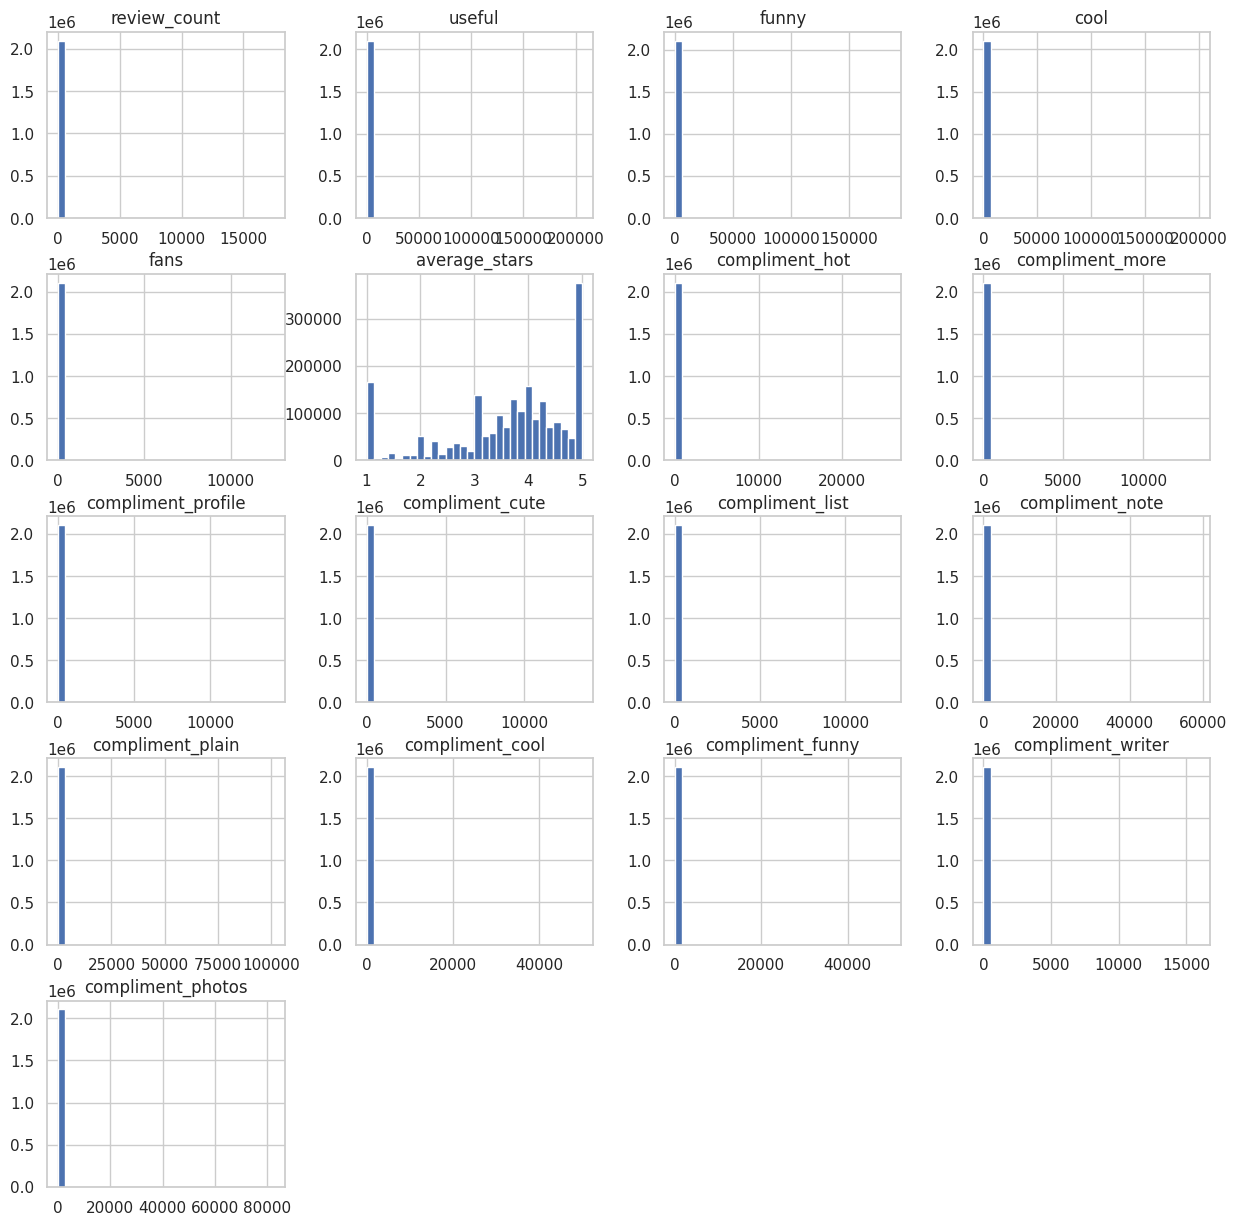

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Histograma de todas las columnas numéricas
df.hist(bins=30, figsize=(15, 15))
plt.show()


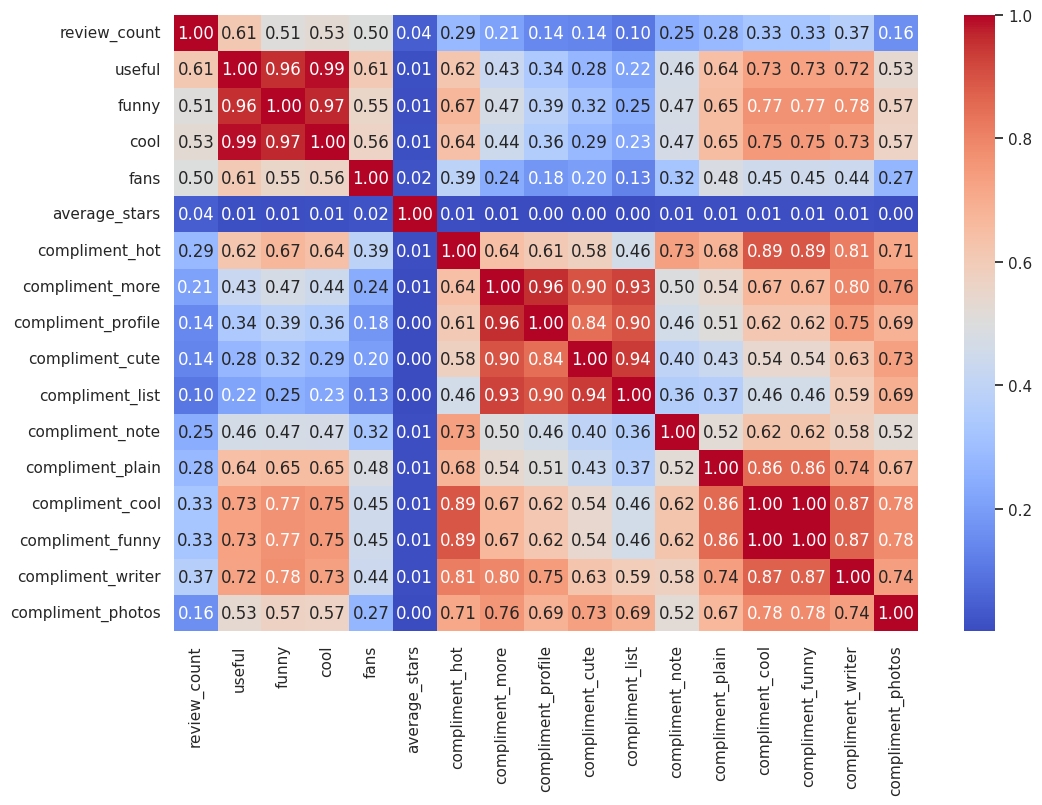

In [ ]:
# Calcular la matriz de correlación solo para columnas numéricas
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
df_new = ['user_id', 'review_count', 'average_stars', 'fans']
df_filtered = df[df_new]
df_filtered.head()

,user_id,review_count,average_stars,fans
0,qVc8ODYU5SZjKXVBgXdI7w,585,3.91,267
1,j14WgRoU_-2ZE1aw1dXrJg,4333,3.74,3138
2,2WnXYQFK0hXEoTxPtV2zvg,665,3.32,52
3,SZDeASXq7o05mMNLshsdIA,224,4.27,28
4,hA5lMy-EnncsH4JoR-hFGQ,79,3.54,1


In [ ]:
# Guardar el DataFrame como un archivo CSV en Google Cloud Storage
df_filtered.to_csv('gs://etl_archivos/users.csv', index=False)